<a href="https://colab.research.google.com/github/TayJen/hackathon_algu2022/blob/master/H_ALGU_2022_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Подготовка данных

In [2]:
%cd /content/drive/Shareddrives/data_drive/H_Vladivostok2022
!pwd

/content/drive/Shareddrives/data_drive/H_Vladivostok2022
/content/drive/Shareddrives/data_drive/H_Vladivostok2022


In [3]:
# !mkdir ./data/train
# !mkdir ./data/test
# !unzip ./data/zipped/train_dataset_train.zip -d ./data/train/
# !unzip ./data/zipped/test_dataset_test.zip -d ./data/test

## Импорт библиотек

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

## Взглянем на данные

In [5]:
df = pd.read_csv("./data/train/train_issues.csv")
df.shape

(9589, 8)

In [6]:
df.head()

,id,created,key,summary,project_id,assignee_id,creator_id,overall_worklogs
0,819952,2019-10-01 05:57:18.000,SM-10678,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800
1,819949,2019-10-01 05:59:45.000,SM-10679,"UI тесты раздела ""Профиль""",5,93,93,7200
2,819947,2019-10-01 06:00:38.000,SM-10680,"UI тесты раздела ""Личный счет""",5,93,93,14400
3,819943,2019-10-01 06:02:49.000,SM-10682,"UI тесты раздела ""Новости""",5,93,93,900
4,819941,2019-10-01 06:03:26.000,SM-10683,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900


In [7]:
df.describe()

,id,project_id,assignee_id,creator_id,overall_worklogs
count,9.589000e+03,9589.000000,9589.000000,9589.000000,9.589000e+03
mean,7.265522e+05,17.493482,114.838461,117.467411,1.724369e+04
std,3.114348e+04,10.389579,125.497901,117.299165,9.864197e+04
min,6.696640e+05,5.000000,1.000000,1.000000,6.000000e+01
25%,7.225060e+05,13.000000,10.000000,11.000000,3.000000e+03
50%,7.256220e+05,13.000000,82.000000,82.000000,7.200000e+03
75%,7.287280e+05,13.000000,197.000000,193.000000,1.470000e+04
max,1.056012e+06,56.000000,384.000000,384.000000,7.014000e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9589 entries, 0 to 9588
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                9589 non-null   int64 
 1   created           9589 non-null   object
 2   key               9589 non-null   object
 3   summary           9589 non-null   object
 4   project_id        9589 non-null   int64 
 5   assignee_id       9589 non-null   int64 
 6   creator_id        9589 non-null   int64 
 7   overall_worklogs  9589 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 599.4+ KB


Проверка на наличие дубликатов

In [9]:
df.duplicated().sum()

0

### Фича created - поработаем с временем

In [10]:
df['created'].tail()

9584    2020-06-15 09:47:30.000
9585    2020-06-02 10:08:14.000
9586    2020-06-05 09:52:12.000
9587    2020-06-05 13:46:38.000
9588    2020-06-09 02:56:25.000
Name: created, dtype: object

In [11]:
df['created'][0]

'2019-10-01 05:57:18.000'

In [12]:
df['created_time'] = pd.to_datetime(df['created'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9589 entries, 0 to 9588
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                9589 non-null   int64         
 1   created           9589 non-null   object        
 2   key               9589 non-null   object        
 3   summary           9589 non-null   object        
 4   project_id        9589 non-null   int64         
 5   assignee_id       9589 non-null   int64         
 6   creator_id        9589 non-null   int64         
 7   overall_worklogs  9589 non-null   int64         
 8   created_time      9589 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 674.4+ KB


In [13]:
df.head()

,id,created,key,summary,project_id,assignee_id,creator_id,overall_worklogs,created_time
0,819952,2019-10-01 05:57:18.000,SM-10678,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019-10-01 05:57:18
1,819949,2019-10-01 05:59:45.000,SM-10679,"UI тесты раздела ""Профиль""",5,93,93,7200,2019-10-01 05:59:45
2,819947,2019-10-01 06:00:38.000,SM-10680,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019-10-01 06:00:38
3,819943,2019-10-01 06:02:49.000,SM-10682,"UI тесты раздела ""Новости""",5,93,93,900,2019-10-01 06:02:49
4,819941,2019-10-01 06:03:26.000,SM-10683,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019-10-01 06:03:26


In [14]:
df.drop('created', axis=1, inplace=True)
df.head()

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,created_time
0,819952,SM-10678,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019-10-01 05:57:18
1,819949,SM-10679,"UI тесты раздела ""Профиль""",5,93,93,7200,2019-10-01 05:59:45
2,819947,SM-10680,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019-10-01 06:00:38
3,819943,SM-10682,"UI тесты раздела ""Новости""",5,93,93,900,2019-10-01 06:02:49
4,819941,SM-10683,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019-10-01 06:03:26


In [15]:
df['year'] = df['created_time'].dt.year
df['month'] = df['created_time'].dt.month
df['day'] = df['created_time'].dt.day
df['hour'] = df['created_time'].dt.hour
df['minute'] = df['created_time'].dt.minute
df.head()

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,created_time,year,month,day,hour,minute
0,819952,SM-10678,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019-10-01 05:57:18,2019,10,1,5,57
1,819949,SM-10679,"UI тесты раздела ""Профиль""",5,93,93,7200,2019-10-01 05:59:45,2019,10,1,5,59
2,819947,SM-10680,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019-10-01 06:00:38,2019,10,1,6,0
3,819943,SM-10682,"UI тесты раздела ""Новости""",5,93,93,900,2019-10-01 06:02:49,2019,10,1,6,2
4,819941,SM-10683,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019-10-01 06:03:26,2019,10,1,6,3


In [16]:
df.drop('created_time', axis=1, inplace=True)
df.head()

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute
0,819952,SM-10678,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019,10,1,5,57
1,819949,SM-10679,"UI тесты раздела ""Профиль""",5,93,93,7200,2019,10,1,5,59
2,819947,SM-10680,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019,10,1,6,0
3,819943,SM-10682,"UI тесты раздела ""Новости""",5,93,93,900,2019,10,1,6,2
4,819941,SM-10683,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019,10,1,6,3


### creator_id

In [17]:
df[df.assignee_id != df.creator_id].head()

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute
7,819933,SM-10686,Сделать разделение по мобильным операторам,5,207,1,7800,2019,10,1,6,6
10,819924,SM-10690,Не отрабатывает cdr_calc_durations,5,264,207,17580,2019,10,1,8,36
13,819917,SM-10693,Собрать водительскую прилу с измененным id вер...,5,8,54,5400,2019,10,2,2,49
14,819912,SM-10694,Фидбек от Чака,5,207,8,4200,2019,10,2,12,41
17,819903,SM-10698,Переделать отчет под новый формат (taxi-corp-s...,5,264,1,55260,2019,10,3,9,41


### project_id

In [18]:
df.project_id.unique()

array([ 5, 13, 15, 29, 33, 48, 56])

In [19]:
# df_test = pd.read_csv('./data/test/test_issues.csv')
# df_test.project_id.unique()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9589 entries, 0 to 9588
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                9589 non-null   int64 
 1   key               9589 non-null   object
 2   summary           9589 non-null   object
 3   project_id        9589 non-null   int64 
 4   assignee_id       9589 non-null   int64 
 5   creator_id        9589 non-null   int64 
 6   overall_worklogs  9589 non-null   int64 
 7   year              9589 non-null   int64 
 8   month             9589 non-null   int64 
 9   day               9589 non-null   int64 
 10  hour              9589 non-null   int64 
 11  minute            9589 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 899.1+ KB


### key

In [21]:
len(df.key.unique())

9576

In [22]:
df.key.unique()

array(['SM-10678', 'SM-10679', 'SM-10680', ..., 'LJ-3', 'LJ-4', 'LJ-5'],
      dtype=object)

In [23]:
df[df['key'].isin(df['key'][df['key'].duplicated()])].sort_values('key')

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute
9520,679334,ADBK-109,Jo.Nawaphon.01 - Cannot access the course deta...,48,1,1,4980,2020,6,5,11,9
8958,689786,ADBK-109,"Readme using the approved format (for EVN, ETL)",48,1,1,14400,2020,3,13,17,52
9521,679333,ADBK-110,Broken course header,48,1,1,4200,2020,6,5,11,15
8959,689784,ADBK-110,How the project is deployed (on staging & prod),48,1,1,14400,2020,3,13,18,7
9537,679332,ADBK-112,Error with SSO Thailand in login,48,1,1,1500,2020,6,8,19,45
8961,689781,ADBK-112,Create a separate sitemap-landings.XML file an...,48,1,374,7200,2020,3,13,22,7
9547,679326,ADBK-114,Tracking button in payment page,48,1,1,24300,2020,6,9,17,29
8966,689777,ADBK-114,"Find one expert in CSS, JS support team",48,1,1,3600,2020,3,16,14,11
9039,689741,ADBK-137,Initiative#3 - Provide flow of contact when ap...,48,1,1,1800,2020,3,24,15,21
9523,679210,ADBK-137,Add margins between sections and add text alig...,48,1,1,7620,2020,6,5,23,9


In [24]:
df['key_name'] = df['key'].apply(lambda x: x.split('-')[0])
df['key_num'] = df['key'].apply(lambda x: x.split('-')[1])

In [25]:
df[df['key_name'] == 'BALT']

,id,key,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,key_num
299,730948,BALT-2,Dashboard redesign - when you login to Teacher...,13,1,1,58200,2018,3,14,11,52,BALT,2
300,730947,BALT-3,Creating a lesson template - basic planning in...,13,1,1,54300,2018,3,14,12,20,BALT,3
302,730942,BALT-8,Markup for Teacher Dashboard page,13,197,197,85200,2018,4,24,13,34,BALT,8
303,730941,BALT-9,Recommended Lessons section,13,197,197,16200,2018,5,1,11,5,BALT,9
304,730940,BALT-10,Your Lessons Section,13,197,197,32400,2018,5,1,11,6,BALT,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7245,721923,BALT-9031,Set up custom dimensions for Google Analytics ...,13,208,374,22800,2020,11,12,9,7,BALT,9031
7246,721922,BALT-9032,Set customer address on checkout form submited,13,11,11,15300,2020,11,12,12,16,BALT,9032
7247,721921,BALT-9033,OA (swagger) documentation,13,330,330,23400,2020,11,12,16,4,BALT,9033
7248,721919,BALT-9035,Update - Lesson template card with Thumbnail c...,13,149,149,35100,2020,11,13,6,21,BALT,9035


In [26]:
df_test = pd.read_csv('./data/test/test_issues.csv')
df_test['key_name'] = df_test['key'].apply(lambda x: x.split('-')[0])
df_test['key_num'] = df_test['key'].apply(lambda x: x.split('-')[1])
df_test[df_test.key_name == 'BALT']

,id,created,key,summary,project_id,assignee_id,creator_id,key_name,key_num
34,721916,2020-11-13 13:07:22.590,BALT-9038,UI components: Recent templates do not inherit...,13,208,208,BALT,9038
35,721915,2020-11-13 13:12:03.932,BALT-9039,UI components: Published date doesn't display ...,13,365,208,BALT,9039
36,721914,2020-11-13 13:19:37.873,BALT-9040,Add unit tests,13,330,330,BALT,9040
37,721913,2020-11-13 13:34:05.484,BALT-9041,Copied onboarding template doesn't copied as l...,13,208,193,BALT,9041
38,721912,2020-11-13 14:56:15.450,BALT-9042,Configure alert and grafana dashboards,13,82,82,BALT,9042
...,...,...,...,...,...,...,...,...,...
802,997097,2021-02-01 10:16:24.916,BALT-10381,Application brakes when teacher goes to Studen...,13,208,193,BALT,10381
803,997095,2021-02-01 12:05:04.151,BALT-10383,Move counters data from organisation table,13,330,330,BALT,10383
804,997094,2021-02-01 13:04:05.042,BALT-10384,Need to add the ability to hide the clear butt...,13,86,86,BALT,10384
805,1040330,2021-02-11 13:29:10.514,BALT-10491,Create quick template mockup,13,107,107,BALT,10491


Можно заметить, что номер ключа не влияет на таргет

In [27]:
df.drop(['key', 'key_num'], axis=1, inplace=True)
df.head()

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name
0,819952,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019,10,1,5,57,SM
1,819949,"UI тесты раздела ""Профиль""",5,93,93,7200,2019,10,1,5,59,SM
2,819947,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019,10,1,6,0,SM
3,819943,"UI тесты раздела ""Новости""",5,93,93,900,2019,10,1,6,2,SM
4,819941,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019,10,1,6,3,SM


### summary

Очистим текст от ненужных символов

In [28]:
import re

def clear_text(text):
    t = re.sub(r'[^a-zA-Z0-9а-яА-ЯёЁ\' ]', ' ', text)
    t = ' '.join(t.split())
    return t

clear_text('Paste Google Dynamic Remarketing Code into the Markeplace (edumall.co.th) hasn\'t Я ему передал номер, да 13-ый')

"Paste Google Dynamic Remarketing Code into the Markeplace edumall co th hasn't Я ему передал номер да 13 ый"

In [29]:
df['clear_summary'] = df['summary'].apply(clear_text)

Проверим на наличие пустых строк

In [30]:
df[df['clear_summary'] == '']

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,clear_summary


In [31]:
df.head()

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,clear_summary
0,819952,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019,10,1,5,57,SM,UI тесты по заказу Добро КейДжи
1,819949,"UI тесты раздела ""Профиль""",5,93,93,7200,2019,10,1,5,59,SM,UI тесты раздела Профиль
2,819947,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019,10,1,6,0,SM,UI тесты раздела Личный счет
3,819943,"UI тесты раздела ""Новости""",5,93,93,900,2019,10,1,6,2,SM,UI тесты раздела Новости
4,819941,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019,10,1,6,3,SM,UI тесты раздела Зоны скидок и доплат


Преобразуем все в нижний регистр

In [32]:
df['clear_summary'] = df['clear_summary'].str.lower()
df.head()

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,clear_summary
0,819952,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019,10,1,5,57,SM,ui тесты по заказу добро кейджи
1,819949,"UI тесты раздела ""Профиль""",5,93,93,7200,2019,10,1,5,59,SM,ui тесты раздела профиль
2,819947,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019,10,1,6,0,SM,ui тесты раздела личный счет
3,819943,"UI тесты раздела ""Новости""",5,93,93,900,2019,10,1,6,2,SM,ui тесты раздела новости
4,819941,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019,10,1,6,3,SM,ui тесты раздела зоны скидок и доплат


In [33]:
df['summary_symbols'] = df['summary'].apply(len)
df['summary_tokens'] = df['summary'].str.split().apply(len)

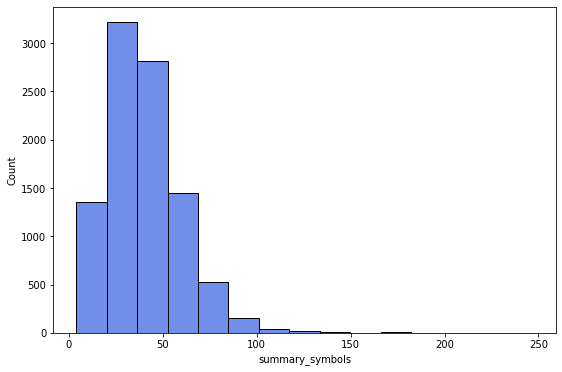

In [34]:
plt.figure(figsize=(9, 6))
sns.histplot(x=df['summary_symbols'], color='royalblue', bins=15)
plt.show()

In [35]:
df[df['summary_symbols'] > 150]['clear_summary']

113     если оформить заказ и указать пины от и до при...
180     рефакторинг кода вынести реализации функций в ...
299     dashboard redesign when you login to teacherly...
301     so the error is inline images 1seems that the ...
6846    assignments id preview page warning failed pro...
6850    templates library warning failed prop type inv...
7110    teacher's app create new route with the new tr...
8821    in admin panel under services need ability to ...
8825    on provider sign up we had asked for two compa...
Name: clear_summary, dtype: object

In [36]:
df[df['summary_symbols'] > 150]['clear_summary'][8825]

'on provider sign up we had asked for two company name options for a legal name and a trading display name which hasn t been implemented check comments for this'

### Посмотрим на таргет

In [37]:
df[df['overall_worklogs'] % 60 != 0]

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,clear_summary,summary_symbols,summary_tokens
9258,689448,Make request to GA after transaction and test it,48,1,1,10188,2020,4,29,14,37,ADBK,make request to ga after transaction and test it,48,9


Всего одна запись, где требуется точность до секунд

Создадим таргет в часах

In [50]:
df['target'] = round(df['overall_worklogs'] / 3600, 2)
df.head()

,id,summary,project_id,assignee_id,creator_id,overall_worklogs,year,month,day,hour,minute,key_name,clear_summary,summary_symbols,summary_tokens,target,log_target
0,819952,"UI тесты по заказу ""Добро КейДжи""",5,93,93,1800,2019,10,1,5,57,SM,ui тесты по заказу добро кейджи,33,6,0.50,7.495542
1,819949,"UI тесты раздела ""Профиль""",5,93,93,7200,2019,10,1,5,59,SM,ui тесты раздела профиль,26,4,2.00,8.881836
2,819947,"UI тесты раздела ""Личный счет""",5,93,93,14400,2019,10,1,6,0,SM,ui тесты раздела личный счет,30,5,4.00,9.574983
3,819943,"UI тесты раздела ""Новости""",5,93,93,900,2019,10,1,6,2,SM,ui тесты раздела новости,26,4,0.25,6.802395
4,819941,"UI тесты раздела ""Зоны скидок и доплат""",5,93,93,900,2019,10,1,6,3,SM,ui тесты раздела зоны скидок и доплат,39,7,0.25,6.802395


In [51]:
df.target.describe()

count    9585.000000
mean        4.362071
std        13.679876
min         0.020000
25%         0.830000
50%         2.000000
75%         4.080000
max       474.330000
Name: target, dtype: float64

In [40]:
len(df[df['target'] > 500])

4

Явные выбросы, выбросим их

In [41]:
df = df.drop(df[df['target'] > 500].index)

In [42]:
df.target.describe()

count    9585.000000
mean        4.362071
std        13.679876
min         0.020000
25%         0.830000
50%         2.000000
75%         4.080000
max       474.330000
Name: target, dtype: float64

In [52]:
df['log_target'] = np.log(df['overall_worklogs'])

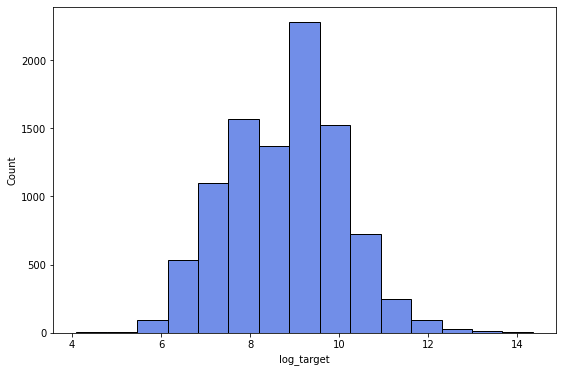

In [53]:
plt.figure(figsize=(9, 6))
sns.histplot(x=df['log_target'], color='royalblue', bins=15)
plt.show()

## Присоединение доп данных

In [135]:
df_coms = pd.read_csv("./data/train/train_comments.csv")
df_coms.head()

,comment_id,text,issue_id,author_id
0,11779,[https://www.youtube.com/watch?v=tuhOdtsvoNY|h...,669666,1
1,10601,OK [~accountid:557058:3f7ab89a-8969-4547-90df-...,669670,1
2,76101,I encountered a problem with access to `/users...,670930,2
3,76102,I have learned that `users/:id/emails` endpoin...,670930,2
4,76213,We have decided with Andrew to set member's em...,670930,2


In [136]:
df_coms.shape

(13918, 4)

In [137]:
sum(df_coms.comment_id.duplicated())

0

In [138]:
df_coms[df_coms.issue_id.duplicated()].head()

,comment_id,text,issue_id,author_id
3,76102,I have learned that `users/:id/emails` endpoin...,670930,2
4,76213,We have decided with Andrew to set member's em...,670930,2
6,75841,I learned how relations work in the cypher lan...,670934,2
7,75842,I'm working on add replies to existing messages.,670934,2
9,69736,Работы по задаче остановлены в связи с замороз...,675981,54
